# Exercise 5: CNN for MNIST Digit Recognition

**Objective:** Build a Convolutional Neural Network to classify handwritten digits

**Dataset:** MNIST (70,000 grayscale images of digits 0-9)

**Target:** Achieve >95% accuracy on test set

**Time:** 60 minutes

---

## What You'll Learn
- How convolution and pooling layers work
- Building CNN architecture from scratch
- Training and evaluating image classification models
- Visualizing learned filters and feature maps

## Step 1: Import Required Libraries and Verify Setup
Import TensorFlow, Keras, NumPy, and Matplotlib for data processing and model building

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# Display version and GPU availability
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {len(tf.config.list_physical_devices('GPU')) > 0}")

TensorFlow version: 2.19.0
GPU available: False


## Step 2: Load and Explore MNIST Dataset
- **Training set:** 60,000 images (28×28 pixels, grayscale)
- **Test set:** 10,000 images
- **Classes:** 10 digit categories (0-9)

In [ ]:
# Load MNIST dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print dataset shapes
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


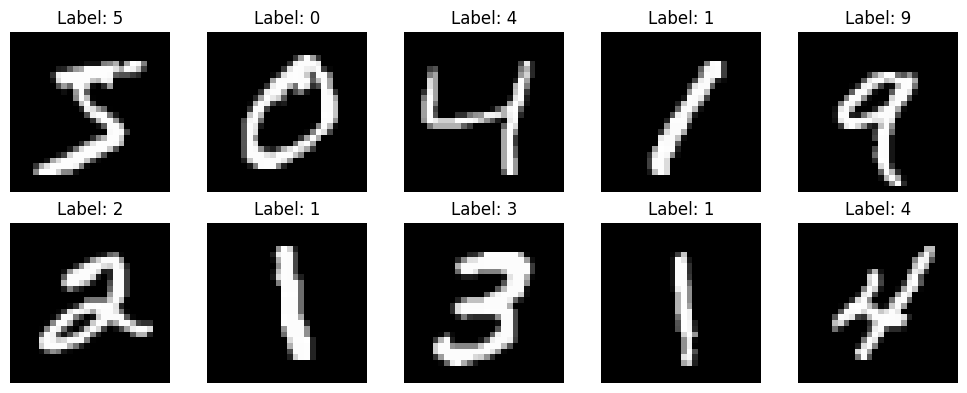

In [5]:
# Visualize some examples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Step 3: Preprocess the Data

**Key preprocessing steps:**
1. Reshape to add channel dimension (28, 28) → (28, 28, 1)
2. Normalize pixel values from [0, 255] → [0, 1]
3. Convert labels to categorical (one-hot encoding)

In [ ]:
# Reshape data to add channel dimension for Conv2D layers
# Shape: (num_samples, 28, 28) → (num_samples, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(f"Reshaped training data: {X_train.shape}")
print(f"Reshaped test data: {X_test.shape}")

New training shape: (60000, 28, 28, 1)
New test shape: (10000, 28, 28, 1)


In [ ]:
# Normalize pixel values from [0, 255] to [0, 1] for faster convergence
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"Min pixel value (normalized): {X_train.min()}")
print(f"Max pixel value (normalized): {X_train.max()}")

Min pixel value: 0.0
Max pixel value: 1.0


In [ ]:
# Convert integer labels to one-hot encoded categorical format
# Example: label 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

print(f"Original label: {y_train[0]}")
print(f"One-hot encoded: {y_train_cat[0]}")

Original label: 5
One-hot encoded: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Step 4: Build the CNN Model

**Architecture to implement:**
1. Conv2D layer: 32 filters, 3x3 kernel, ReLU activation
2. MaxPooling2D: 2x2 pool size
3. Conv2D layer: 64 filters, 3x3 kernel, ReLU activation
4. MaxPooling2D: 2x2 pool size
5. Flatten layer
6. Dense layer: 128 units, ReLU activation
7. Dropout: 0.5
8. Dense output layer: 10 units, softmax activation

In [ ]:
# Build CNN model using Sequential API
model = keras.Sequential([
    # First convolutional block: 32 filters, detect edges and patterns
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional block: 64 filters, detect more complex features
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten: convert 2D features to 1D vector
    layers.Flatten(),
    
    # Fully connected layers: classification
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer: 10 classes
])

# Display model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Compile the Model

**Compilation parameters:**
- Optimizer: Adam
- Loss function: Categorical crossentropy
- Metrics: Accuracy

In [ ]:
# Compile the model with optimizer, loss function, and metrics
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Step 6: Train the Model
Train on 90% of training set, validate on 10% for 10 epochs

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,  # Use 10% of training data for validation
    epochs=10,
    batch_size=128,
    verbose=1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 101ms/step - accuracy: 0.8446 - loss: 0.5290 - val_accuracy: 0.9790 - val_loss: 0.0706
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 79s 94ms/step - accuracy: 0.9811 - loss: 0.0648 - val_accuracy: 0.9835 - val_loss: 0.0595
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.9875 - loss: 0.0409 - val_accuracy: 0.9872 - val_loss: 0.0429
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.9903 - loss: 0.0318 - val_accuracy: 0.9883 - val_loss: 0.0413
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.9922 - loss: 0.0237 - val_accuracy: 0.9897 - val_loss: 0.0330
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.9883 - val_loss: 0.0424
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.9882 - val_loss: 0.0463
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - accuracy: 0.9966 - loss: 0.0110 -

## Step 7: Evaluate the Model

In [ ]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9875 - loss: 0.0380
0.030628781765699387 
 0.9908999800682068


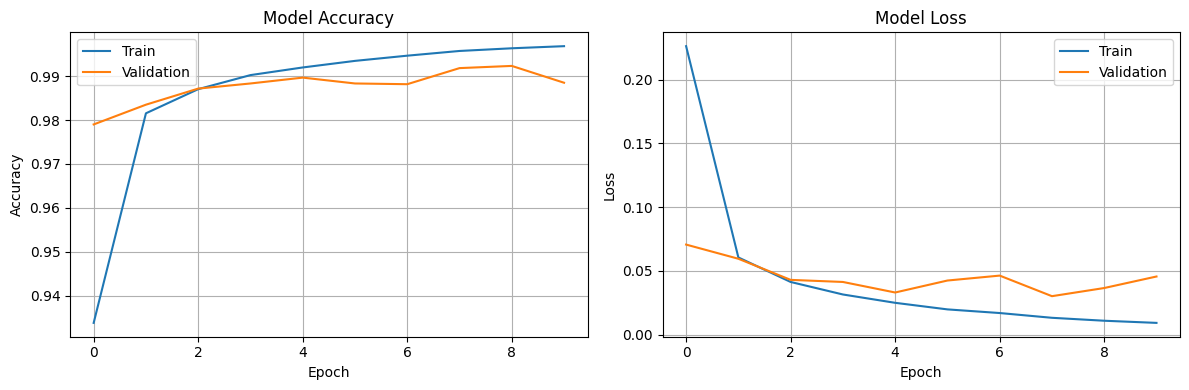

In [ ]:
# Visualize training progress over epochs
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 8: Make Predictions and Visualize Results
Test predictions on individual examples and see model confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


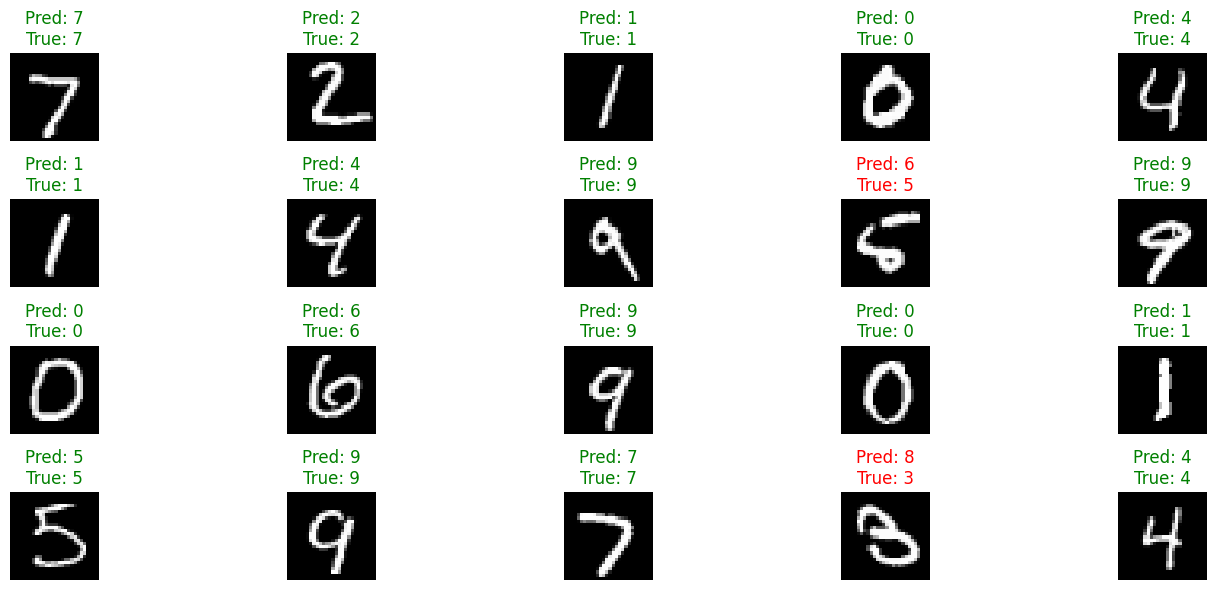

In [ ]:
# Make predictions on first 20 test samples
predictions = model.predict(X_test[:20])
predicted_classes = np.argmax(predictions, axis=1)

# Visualize predictions with color coding (green=correct, red=incorrect)
plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    color = 'green' if predicted_classes[i] == y_test[i] else 'red'
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {y_test[i]}", color=color, fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Accuracy on first 20 samples: {np.sum(predicted_classes == y_test[:20])/20*100:.1f}%")

## Step 9: Analyze Misclassifications
Identify and visualize digits that the model got wrong

In [ ]:
# Find all misclassified examples in the full test set
y_pred_probs = model.predict(X_test)
predicted_labels = np.argmax(y_pred_probs, axis=1)

# Find indices where prediction does not match true label
misclassified = np.where(predicted_labels != y_test)[0]

# Calculate error statistics
error_count = len(misclassified)
error_rate = error_count / len(y_test)

print(f"Total misclassified: {error_count}")
print(f"Error rate: {error_rate*100:.2f}%")
print(f"Accuracy: {(1-error_rate)*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
0.0091


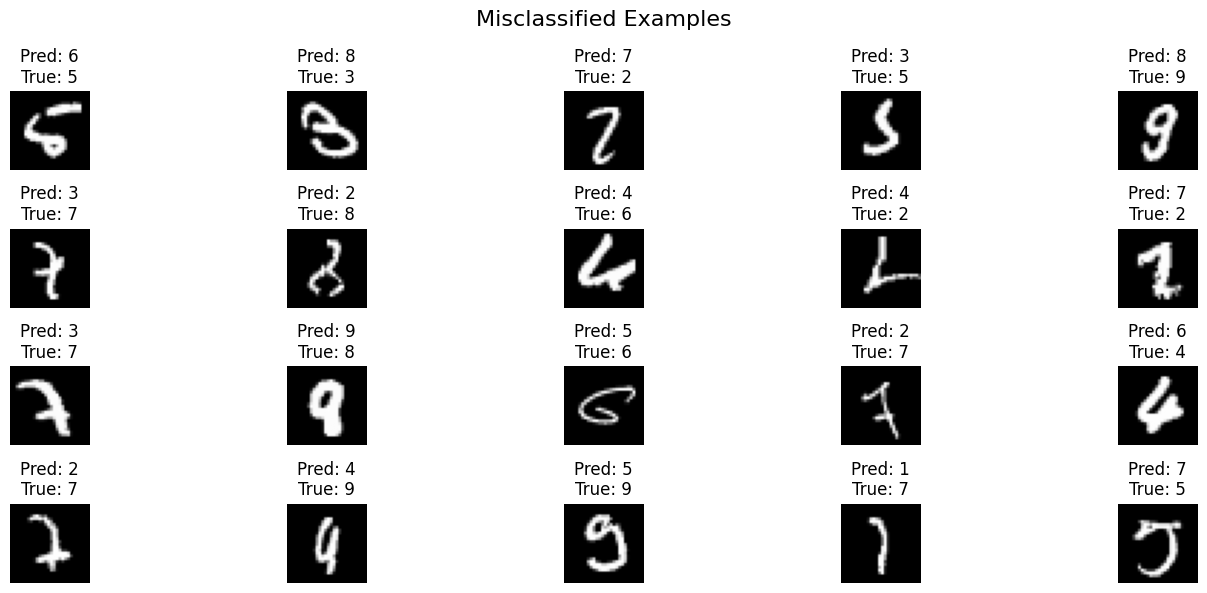

In [ ]:
# Visualize the first 20 misclassified examples to understand model weaknesses
plt.figure(figsize=(15, 6))
for i, idx in enumerate(misclassified[:20]):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[idx]}\nTrue: {y_test[idx]}", fontsize=9)
    plt.axis('off')
plt.suptitle('Misclassified Examples (First 20)', fontsize=14)
plt.tight_layout()
plt.show()

## Step 10: Visualize Learned Filters (Optional)

Let's see what patterns the first convolutional layer learned!

Filter shape: (3, 3, 1, 32)


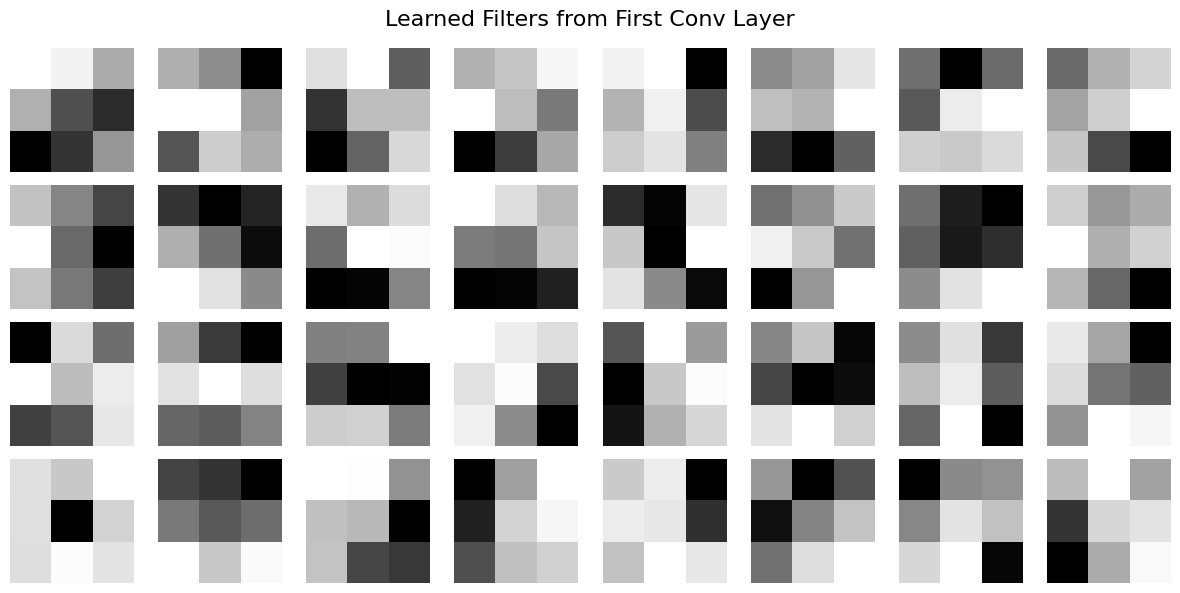

In [ ]:
# Extract learned filters from the first convolutional layer
filters, biases = model.layers[0].get_weights()
print(f"Filter shape: {filters.shape}")  # Expected: (3, 3, 1, 32)

# Normalize filters to [0, 1] for visualization
f_min, f_max = filters.min(), filters.max()
filters_normalized = (filters - f_min) / (f_max - f_min)

# Visualize all 32 learned 3x3 filters from the first Conv layer
plt.figure(figsize=(12, 6))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters_normalized[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.suptitle('First Conv Layer - 32 Learned Filters (3×3)', fontsize=14)
plt.tight_layout()
plt.show()

## 🏆 Challenge Tasks

Try these to deepen your understanding:

1. **Improve accuracy to >98%:** Add more Conv layers or increase filters
2. **Data augmentation:** Add rotation, zoom, and shift transformations
3. **Confusion matrix:** Visualize which digits are commonly confused
4. **Feature maps:** Visualize activations from intermediate layers
5. **Fashion-MNIST:** Apply this model to Fashion-MNIST dataset

## 📊 Reflection Questions

1. Why do we use MaxPooling layers?
2. What happens if you remove the Dropout layer?
3. Why is the first Conv layer filter count (32) smaller than the second (64)?
4. How would you modify this for RGB images?
5. What does each filter in the first Conv layer detect?